## Scikit-Learn Example

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Using Theano backend.
WARNING (theano.configdefaults): Only clang++ is supported. With g++, we end up with strange g++/OSX bugs.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Populating the interactive namespace from numpy and matplotlib


### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [32]:
from sklearn.datasets import make_blobs

df = pd.read_csv('2016-17_advanced.csv')
df = df[df['MP'] >= 500]
df = df[df['Yr'] >= 2011]
# df = df[df['Player_ID'].duplicated()]
# df = df[df['Pos'] != 'PG']
# df = df[df['Pos'] != 'SG']
# df = df[df['Pos'] != 'SF']
# df = df[df['Pos'] != 'PF']
# df = df[df['Pos'] == 'C']
df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
   images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(pid[i], str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

#### Scatterplot of sample data

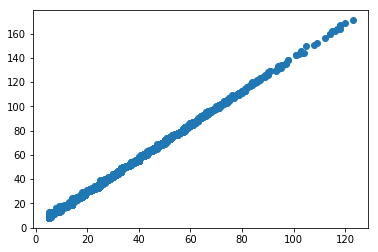

In [33]:
plt.scatter(X[:,0], X[:,1])

### Use 'Elbow' method to find optimal value of K

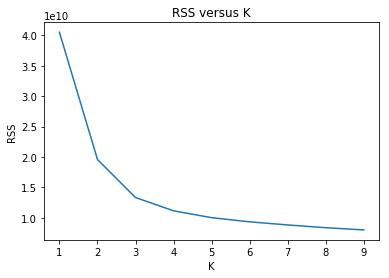

In [34]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    rss = -km.score(X)
    return rss
scores = [kmean_score(i) for i in range(1,10)]
plt.plot(range(1,10), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K')


### Use Silhouette scores to find optimal value of K

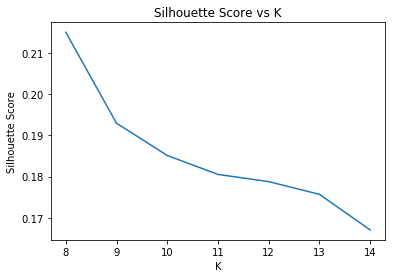

In [35]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(8,15)]
plt.plot(range(8,15), sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')


The maximum silhouette score is at 2 and there is a local maximum at 4

### Silhouette Plots provide even more detail about each clustering

For n_clusters = 8 The average silhouette_score is : 0.193753470088


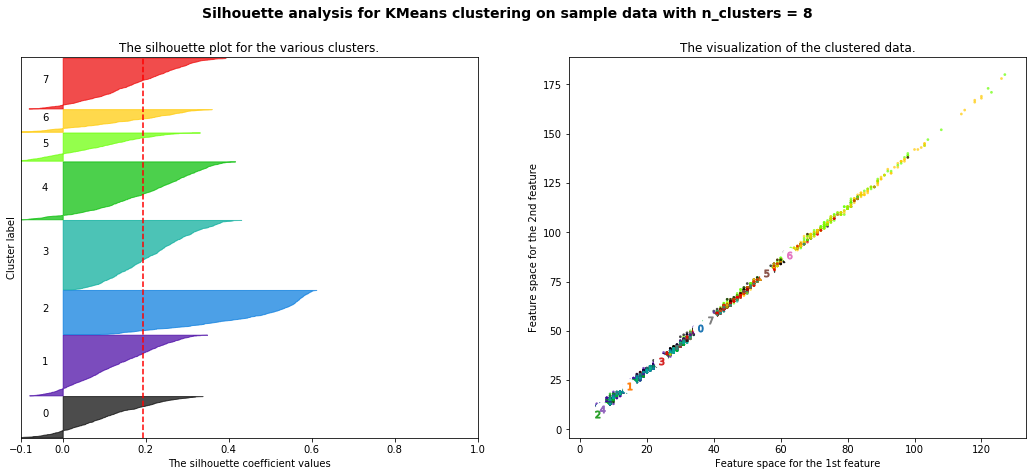

For n_clusters = 9 The average silhouette_score is : 0.186886586944


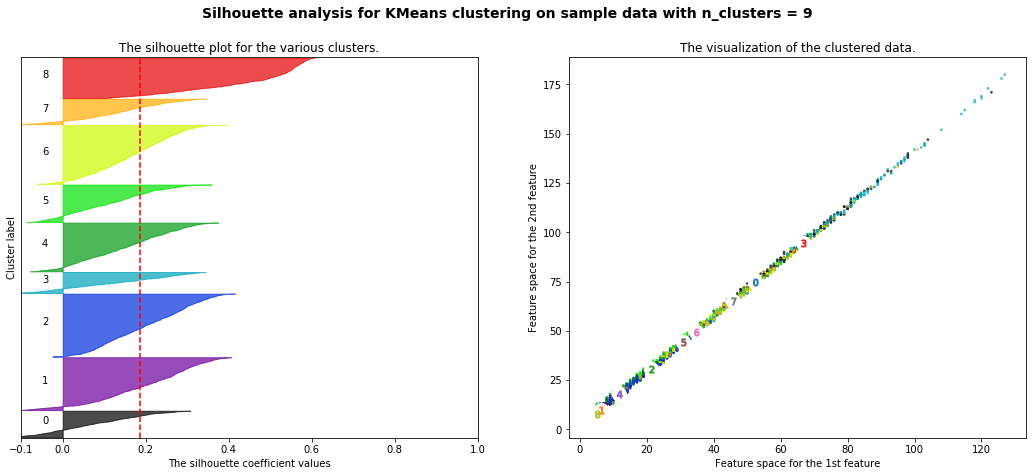

For n_clusters = 10 The average silhouette_score is : 0.175390587833


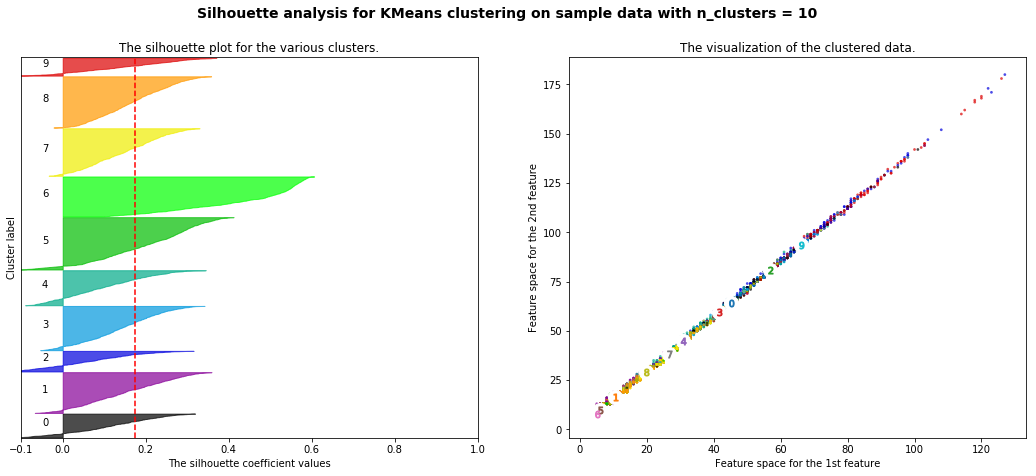

For n_clusters = 11 The average silhouette_score is : 0.176353380658


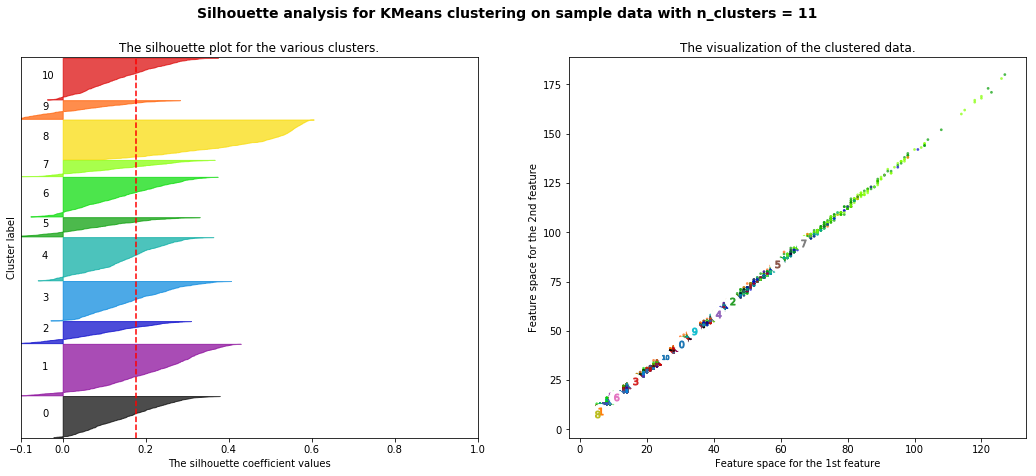

For n_clusters = 12 The average silhouette_score is : 0.173165454893


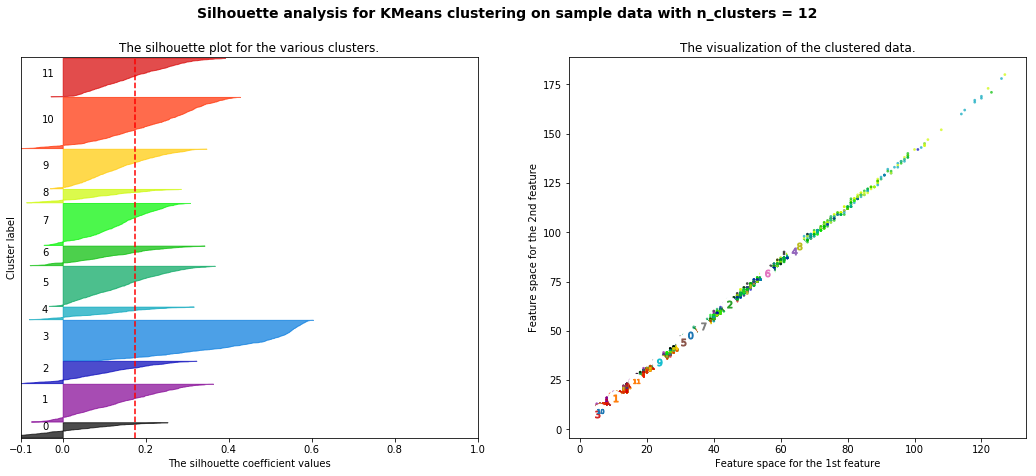

For n_clusters = 13 The average silhouette_score is : 0.16956902967


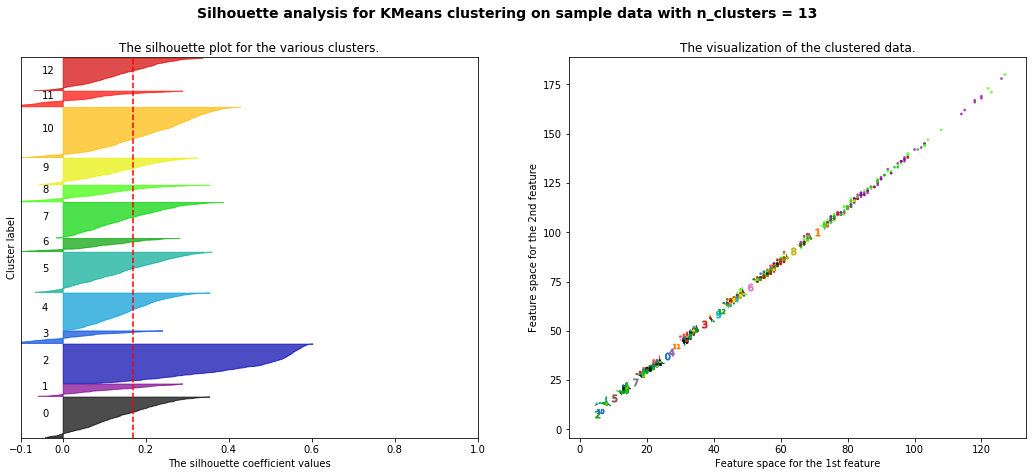

For n_clusters = 14 The average silhouette_score is : 0.150871016743


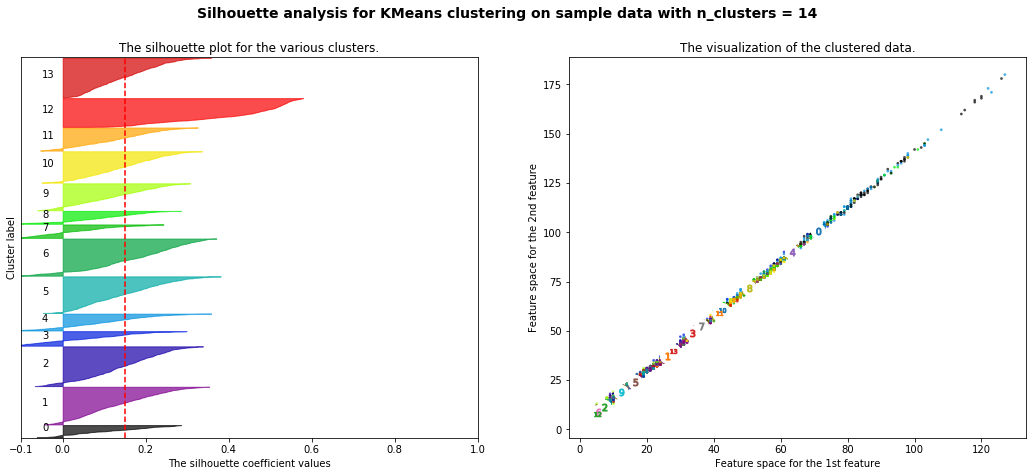

In [7]:
from helper import cluster_and_plot
for i in range(8,15):
    cluster_and_plot(X, i)

In [22]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 12

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 12 The average silhouette_score is : 0.174597026191


In [45]:
df[df['cluster_labels'] == 6]

,Player,Player_ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Yr,cluster_labels
1781,Kobe Bryant,977,SG,34,LAL,78,3013,23.0,0.570,0.255,...,8.4,2.6,10.9,0.174,5.2,-0.5,4.7,5.1,2013,6
2210,Stephen Jackson,1536,SG,32,CHA,67,2405,14.6,0.520,0.339,...,-0.2,2.1,1.9,0.039,0.6,-0.8,-0.2,1.1,2011,6
2406,Paul Pierce,1718,SF,36,BRK,75,2098,16.8,0.595,0.421,...,2.9,2.3,5.2,0.119,1.3,0.2,1.5,1.8,2014,6
2407,Paul Pierce,1718,SF,35,BOS,77,2575,19.1,0.559,0.350,...,3.5,3.7,7.2,0.135,2.7,0.7,3.4,3.4,2013,6
2408,Paul Pierce,1718,SF,34,BOS,61,2075,19.6,0.567,0.307,...,3.3,3.7,7.0,0.161,3.3,1.1,4.4,3.4,2012,6
2409,Paul Pierce,1718,SF,33,BOS,80,2774,19.7,0.620,0.291,...,6.5,5.1,11.6,0.201,3.1,1.6,4.7,4.7,2011,6
2629,Brad Miller,1802,C,34,HOU,60,1015,16.3,0.566,0.361,...,2.0,1.0,3.0,0.142,1.2,0.6,1.7,0.9,2011,6
2688,Baron Davis,1884,PG,31,TOT,58,1649,17.0,0.506,0.345,...,1.5,1.3,2.8,0.081,2.2,-1.5,0.7,1.1,2011,6
2793,Corey Maggette,1894,SF,32,CHA,32,881,14.1,0.517,0.177,...,0.5,0.1,0.7,0.038,-1.4,-3.7,-5.2,-0.7,2012,6
2927,Manu Ginobili,1938,SG,40,SAS,65,1299,12.9,0.553,0.415,...,0.6,1.6,2.2,0.082,-0.5,-0.5,-1.0,0.3,2018,6
